In [50]:
!ls *.csv

LoanStats3a.csv
LoanStats3b.csv
LoanStats3c.csv
LoanStats3d.csv
LoanStats_2016Q1.csv
LoanStats_2016Q2.csv
LoanStats_2016Q3.csv
LoanStats_2016Q4.csv
LoanStats_2017Q1.csv
LoanStats_2017Q2.csv
LoanStats_2017Q3.csv
LoanStats_2017Q4.csv
LoanStats_2018Q1.csv
LoanStats_2018Q2.csv
LoanStats_2018Q3.csv
LoanStats_2018Q4.csv
LoanStats_2019Q1.csv
primaryMarketNotes_browseNotes_1-RETAIL.csv


In [22]:
!ls *.csv | wc -l

      18


In [23]:
import pandas as pd
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200
browse = pd.read_csv('primaryMarketNotes_browseNotes_1-RETAIL.csv')
browse.shape

(58, 122)

In [24]:
browse.head()

,id,member_id,loan_amnt,funded_amnt,term,int_rate,exp_default_rate,service_fee_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,is_inc_v,accept_d,exp_d,list_d,credit_pull_d,review_status_d,review_status,url,desc,purpose,title,zip_code,addr_state,msa,acc_now_delinq,acc_open_past_24mths,bc_open_to_buy,percent_bc_gt_75,bc_util,dti,delinq_2yrs,delinq_amnt,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,mths_since_recent_inq,mths_since_recent_revol_delinq,mths_since_recent_bc,mort_acc,open_acc,pub_rec,total_bal_ex_mort,revol_bal,revol_util,total_bc_limit,total_acc,total_il_high_credit_limit,num_rev_accts,mths_since_recent_bc_dlq,initial_list_status,ils_exp_d,pub_rec_bankruptcies,num_accts_ever_120_pd,chargeoff_within_12_mths,collections_12_mths_ex_med,tax_liens,mths_since_last_major_derog,num_sats,num_tl_op_past_12m,mo_sin_rcnt_tl,tot_hi_cred_lim,tot_cur_bal,avg_cur_bal,num_bc_tl,num_actv_bc_tl,num_bc_sats,pct_tl_nvr_dlq,num_tl_90g_dpd_24m,num_tl_30dpd,num_tl_120dpd_2m,num_il_tl,mo_sin_old_il_acct,num_actv_rev_tl,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,total_rev_hi_lim,num_rev_tl_bal_gt_0,num_op_rev_tl,tot_coll_amt,effective_int_rate,application_type,disbursement_method,annual_inc_joint,dti_joint,verified_status_joint,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,inq_fi,total_cu_tl,inq_last_12m,mtg_payment,housing_payment,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
0,152167636,186565679,22000.0,19675.0,60,11.71,5.49,0.73,486.16,B,B3,NaN,< 1 year,MORTGAGE,60000.0,Not Verified,05-24-2019 06:08:38,07-07-2019 14:00:00,06-07-2019 14:00:00,05-21-2019 09:55:17,06-07-2019 10:00:50,Approved,https://lendingclub.com/browse/loanDetail.acti...,,Credit card refinancing,Credit card refinancing,751xx,TX,NaN,0,2,13573,40.0,58.2,14.65,0,0.0,12-20-1999 16:00:00,665,669,1,52,,3,,2,5,9,0,21005,21005.0,54.6,32500,26,0,15,,f,NaN,0,0,0,0,0,NaN,9,2,2,103750,75437,8382,8,4,5,96,0,0,0,6,154,5,226,2,38500,5,8,989,11.60,INDIVIDUAL,DIRECT_PAY,,,,2,0,0,0,73,0.0,,2,2,9285.0,54.6,0,3,2,736.00,,,,,,,,,,,,,,
1,153003150,188095322,28000.0,26725.0,36,8.19,2.16,0.86,879.88,A,A4,NaN,< 1 year,RENT,80000.0,Not Verified,06-06-2019 21:39:53,07-07-2019 18:00:00,06-07-2019 18:00:00,06-04-2019 20:38:53,06-07-2019 13:56:56,Approved,https://lendingclub.com/browse/loanDetail.acti...,,Debt consolidation,Debt consolidation,921xx,CA,NaN,0,1,13197,75.0,71.0,32.19,0,0.0,09-04-2005 17:00:00,715,719,0,,,16,,40,0,14,0,135969,32303.0,71.0,45500,33,140166,12,,f,NaN,0,0,0,0,0,NaN,14,0,16,185666,135969,9712,12,7,8,100,0,0,0,21,156,7,165,40,45500,7,8,0,8.18,INDIVIDUAL,CASH,,,,0,6,0,1,16,103666.0,58.7,0,0,7843.0,63.0,1,2,0,0.00,,,,,,,,,,,,,,
2,152654206,187356227,27000.0,22500.0,36,10.33,5.15,1.01,875.41,B,B1,Logistics Manager,1 year,RENT,72000.0,Source Verified,06-05-2019 07:21:02,07-06-2019 10:00:00,06-06-2019 10:00:00,05-30-2019 04:47:10,06-06-2019 06:02:41,Approved,https://lendingclub.com/browse/loanDetail.acti...,,Credit card refinancing,Credit card refinancing,480xx,MI,NaN,0,4,5880,40.0,75.0,21.38,0,0.0,02-27-2007 16:00:00,675,679,0,25,74,8,,22,0,10,1,35499,22028.0,54.9,23500,19,24193,10,,f,NaN,1,1,0,1,0,25.0,10,2,4,64293,35499,3550,5,3,5,94,0,0,0,9,110,4,147,4,40100,4,8,151,10.22,INDIVIDUAL,DIRECT_PAY,,,,1,2,1,2,7,13471.0,55.7,1,2,11381.0,55.2,1,1,2,0.00,,,,,,,,,,,,,,
3,152209289,186627083,40000.0,15725.0,36,25.00,12.86,1.42,1590.40,D,D4,NaN,3 years,MORTGAGE,9500.0,Verified,05-27-2019 08:52:04,07-08-2019 14:00:00,06-08-2019 14:00:00,05-21-2019 15:03:03,06-08-2019 09:57:43,Approved,https://lendingclub.com/browse/loanDetail.acti...,,Debt consolidatio

In [33]:
!ls *.xlsx

LCDataDictionary.xlsx


In [35]:
dictionary1 = pd.read_excel('LCDataDictionary.xlsx', sheet_name = 0).set_index('LoanStatNew')
dictionary2 = pd.read_excel('LCDataDictionary.xlsx', sheet_name = 1).set_index('BrowseNotesFile')

In [38]:
browse['worse'] = -25
browse['best'] = (25 * browse['term']/ 12 *( browse['int_rate'] - browse['service_fee_rate'])/ 100)

In [39]:
columns = ['term', 'int_rate', 'exp_default_rate', 'service_fee_rate',
           'best', 'worse']

browse[columns].sort_values(by = 'best', ascending = False)

,term,int_rate,exp_default_rate,service_fee_rate,best,worse
26,60,22.50,12.91,1.12,26.7250,-25
50,60,17.97,12.91,1.12,21.0625,-25
32,36,28.80,12.63,1.49,20.4825,-25
46,36,28.80,12.63,1.49,20.4825,-25
13,60,16.40,7.33,0.83,19.4625,-25
12,60,15.57,7.33,0.83,18.4250,-25
18,36,25.00,12.86,1.42,17.6850,-25
3,36,25.00,12.86,1.42,17.6850,-25
48,36,25.00,12.63,1.49,17.6325,-25
9,36,22.50,12.86,1.42,15.8100,-25


In [41]:
import numpy as np
picks = browse.sample(40)
picks['default'] = picks['exp_default_rate'] > np.random.rand(len(picks)) * 100
picks['default'].value_counts()

False    36
True      4
Name: default, dtype: int64

In [44]:
picks['paid'] = picks['best']
picks.loc[picks['default'], 'paid'] = picks['worse']
columns += ['default', 'paid']

picks['paid'].sum()

275.635

In [47]:
from tqdm import tnrange, tqdm_notebook
from time import sleep

simulations = []
for _ in tnrange(10000):
    picks['default'] = picks['exp_default_rate'] > np.random.rand(len(picks)) * 100
    picks['paid'] = picks['best']
    picks.loc[picks['default'], 'paid'] = picks['worse']
    paid = picks['paid'].sum()
    simulations.append(paid)
pd.Series(simulations).describe()

count    10000.000000
mean       325.540246
std         61.353505
min         -0.235000
25%        283.583125
50%        327.192500
75%        362.800000
max        429.845000
dtype: float64

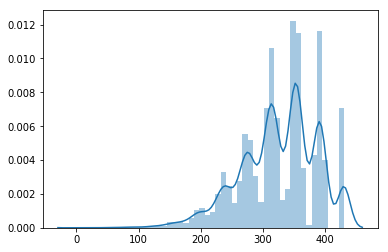

In [48]:
%matplotlib inline
import seaborn as sns
sns.distplot(simulations);

In [51]:
loans2019q1 = pd.read_csv('LoanStats_2019Q1.csv', 
                          skiprows=1, skipfooter=2, engine='python')

In [53]:
loans2019q1.shape

(115675, 144)

In [54]:
loans2019q1['loan_status'].value_counts()

Current               110918
Fully Paid              3608
Late (31-120 days)       468
In Grace Period          327
Late (16-30 days)        256
Charged Off               98
Name: loan_status, dtype: int64

In [55]:
loans2019q1['grade'].value_counts()

A    37060
B    33129
C    27277
D    14797
E     3364
F       31
G       17
Name: grade, dtype: int64

In [58]:
def a_to_d_done(df):
    a_to_d = df['grade'].isin(['A', 'B', 'C', 'D'])
    done = df['loan_status'].isin(['Fully Paid', 'Charged Off'])
    return a_to_d & done

df = loans2019q1.where(a_to_d_done).dropna(subset=['grade', 'loan_status'])
df['grade'].value_counts(dropna=False)

B    999
C    921
A    917
D    655
Name: grade, dtype: int64

In [59]:
from glob import glob
files = glob('LoanStats*.csv')

dfs = (pd.read_csv(file, skiprows=1, skipfooter=2, engine='python')
       .where(a_to_d_done)
       .dropna(subset=['grade', 'loan_status'])
       for file in tqdm_notebook(files))

df = pd.concat(dfs)
df.shape

(1283340, 144)

In [60]:
from sklearn.model_selection import train_test_split

subset, _ = train_test_split(df.copy(), train_size=0.10, 
                             stratify=df['loan_status'])

/Users/danielcalimayor/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [61]:
subset.to_csv('lending-club-subset.csv', index=False)
common_columns = set(subset.columns) & set(browse.columns)

In [62]:
len(common_columns), len(subset.columns), len(browse.columns)

(102, 144, 124)

In [63]:
set(subset.columns) - set(browse.columns)

{'collection_recovery_fee',
 'debt_settlement_flag',
 'debt_settlement_flag_date',
 'deferral_term',
 'funded_amnt_inv',
 'hardship_amount',
 'hardship_dpd',
 'hardship_end_date',
 'hardship_flag',
 'hardship_last_payment_amount',
 'hardship_length',
 'hardship_loan_status',
 'hardship_payoff_balance_amount',
 'hardship_reason',
 'hardship_start_date',
 'hardship_status',
 'hardship_type',
 'issue_d',
 'last_credit_pull_d',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'loan_status',
 'next_pymnt_d',
 'orig_projected_additional_accrued_interest',
 'out_prncp',
 'out_prncp_inv',
 'payment_plan_start_date',
 'policy_code',
 'pymnt_plan',
 'recoveries',
 'settlement_amount',
 'settlement_date',
 'settlement_percentage',
 'settlement_status',
 'settlement_term',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_late_fee',
 'total_rec_prncp',
 'verification_status',
 'verification_status_joint'}

In [64]:
subset['percent_paid'] = subset['total_pymnt'] / subset['funded_amnt']
subset.groupby('loan_status')['percent_paid'].mean()

loan_status
Charged Off    0.550248
Fully Paid     1.146966
Name: percent_paid, dtype: float64

In [65]:
subset['paid'] = 25 * subset['percent_paid']
subset['paid'].describe()

count    128334.000000
mean         26.061359
std           6.691415
min           0.000000
25%          26.102867
50%          27.839400
75%          29.537568
max          40.027901
Name: paid, dtype: float64

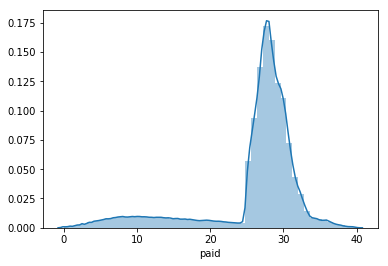

In [69]:
sns.distplot(subset['paid']);

In [66]:
simulations = []
for _ in tnrange(10000):
    picks = subset.sample(40).copy()
    paid = picks['paid'].sum()
    simulations.append(paid)
pd.Series(simulations).describe()

count    10000.000000
mean      1042.382718
std         42.660384
min        824.801352
25%       1015.104666
50%       1045.295482
75%       1072.623824
max       1186.219388
dtype: float64

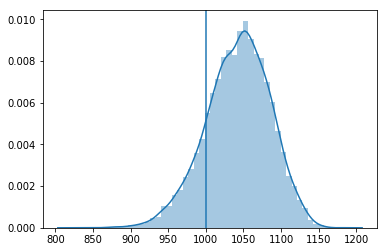

In [68]:
%matplotlib inline
import seaborn as sns
ax = sns.distplot(simulations)
ax.axvline(x=1000);

In [71]:
! jupyter nbconvert --to html Daniel_Calimayor_explore_lending_club_ASSIGNMENT.ipynb

[NbConvertApp] Converting notebook Daniel_Calimayor_explore_lending_club_ASSIGNMENT.ipynb to html
[NbConvertApp] Writing 384937 bytes to Daniel_Calimayor_explore_lending_club_ASSIGNMENT.html
